# 4.1. Інтерполяція функцій поліномами
--------------------

Нехай треба наблизити функцію  $y=f(x),\, x\in [a,b],$ поліномами

$(1)\quad\qquad\qquad\qquad L_n (x)= \sum_{i=0}^n a_i x^i, \; n\in \mathbb{N}\cup \{0\},$

якщо відомі значення цієї функції $ f_0 = f(x_0),\, f_1 = f(x_1), ... ,\, f_n = f(x_n)$ на скінченій множині точок $ x_0, x_1, ... , x_n$. 

Використовують різні підходи для побудови інтерполяційних поліномів, зокрема для знаходження невідомих коефіцієнтів $a_i$, $i=\overline{0,n}$.

## 4.1.2. Інтерполяційний поліном Ньютона
-----------
Інтерполяційний поліном Ньютона $L_n(x)$ є такою формою подання інтерполяційного полінома, яка забезпечує його обчислення через відповідне значення $L_{n-1}(x)$:

$(5)\quad\qquad\qquad\qquad L_n(x) = L_{n-1}(x) + (x-x_0)(x-x_1) \ldots (x-x_{n-1})f(x_0;x_1; \ldots; x_n), \; n \in  \mathbb{N},$


де $f(x_0;x_1; \ldots; x_n)$ -- розділена різниця $n$-го порядку.

Розділені різниці обчислюють рекурентно за формулю

$(5)\quad\qquad\qquad
f(x_{i-1};x_{i}; \ldots; x_{i+k}):=\dfrac{f(x_{i};x_{i+1}; \ldots; x_{i+k}) - f(x_{i-1};x_{i}; \ldots;
x_{i+k-1})}{x_{i+k}-x_{i-1}},\; i=\overline{1, n-k},\; k=\overline{1, n}.$

Під час обчислення розділені різниці можна зберігаюти у такій структурі з рядками змінної довжини

\begin{equation}
\begin{cases}
f(x_0) \\
f(x_1) \quad f(x_0; x_1) \\
f(x_2) \quad f(x_1; x_2) \quad f(x_0; x_1; x_2)\\
 \ldots\quad \quad \ldots  \\
f(x_n) \quad f(x_{n-1}; x_n)  \quad f(x_{n-2}; x_{n-1}; x_n) \quad \ldots \quad f(x_0;x_1; \ldots; x_n),
\end{cases}
\end{equation}

У явному вигляді подання (5) можна переписати так

$ L_{n}(x)= f(x_{0})+(x-x_{0}) f(x_{0};x_{1}) + (x-x_{0})(x-x_{1}) f(x_{0};x_{1};x_{2})+ \ldots +(x-x_{0})(x-x_{1}) \ldots (x-x_{n-1}) f(x_{0};x_{1};
\ldots; x_{n}).
$

#### Пояснення до використання програмного коду
-----------------
*   Підготувати потрібні функції : 
    1.   виконати комірку з імпортом бібліотек ``numpy`` і ``matplotlib``  
    2.   виконати комірки, де **визначені** функції ``divided_differences``,``Newton_interpolation`` і ``N_interpolator``



*   Для отримання наближення конкретної функції **в одній точці** :  
    1.   запрограмувати і виконати комірку, де **визначені** функції ``xv,fv``
    2.   викликаючи відповідні функції, обчислити вузли інтерполювання, значення функції та розділені різниці
    3.   викликати функцію ``Newton_interpolation`` з відповідними значеннями аргументів

*   Для отримання наближення конкретної функції в ``ng`` **рівновіддалених точках** на ``[a,b]``
    1.   запрограмувати і виконати комірку, де **визначені** функції ``xv,fv``
    2.   викликати функцію ``N_interpolator`` з відповідними значеннями аргументів; у цьому випадку за замовчуванням (при ``prnt=True`` ) будуть побудовані графіки полінома і функції, яку інтерполюють (при ``fr=True`` )

*   Приклади знаходження наближених розв'язків див. у розділі **Обчислювальний експеримент**  

In [1]:
# Імпорт бібліотек
%matplotlib inline
#%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def divided_differences(xs,f):
    """ """
    ddm=np.empty(xs.size)
    ddm[0]=f[0]
    
    dd=list()
    dd.append(f)   
    n=xs.size-1
    
    for k in range(1,n+1):
        fn=np.empty(n-k+1)
        for i in range(n-k+1):            
            fn[i]=(dd[k-1][i+1]-dd[k-1][i])/(xs[i+k]-xs[i])
        ddm[k]=fn[0]
        dd.append(fn)
    return ddm      

In [3]:
def Newton_interpolation(x,k, xs, ddm):
    pk=ddm[0]
    w=1
    for i in range(1,k+1):
        w*=x-xs[i-1]
        pk+=w*ddm[i]       
    return pk

In [4]:
def N_interpolator(xv,fv,a,b,n,m,ng,prnt=True,fr=False):
    """наближення заданої таблично функції на відрізку [a,b] поліномом Ньютона m-го степеня
       xv - функція, яка встановлює вузли інтерполювання
       fv - функція, яка задає табличні значення функції у вузлах інтерполювання
       ng - кількість точок, у яких обчислюють значення полінома
    """
    x=xv(a,b,n)
    
    if m>x.size-1:
        print(f" недостатня кількість інтерполяційних вузлів")
        return
    
    f=fv(a,b,n)
    ddm=divided_differences(x,f)
    
    xg=np.linspace(a,b,ng+1)

    pm=np.empty(ng+1)
    i=0
    for xi in xg:
        pm[i]=Newton_interpolation(xi,m, x, ddm)
        i+=1
    
    if prnt== False:
        return pm
    
    fig = plt.figure(figsize=(8, 5))
    ax = fig.gca()
    ax.axhline(color="grey", ls="--", zorder=-1)
    ax.axvline(color="grey", ls="--", zorder=-1)
    plt.plot(xg, pm)
    
    plt.scatter(x, f, marker='o')
    if fr==True:
        plt.plot(xg, fv(a,b,ng),'--')
    
    return pm    

## Обчислювальні експерименти
____________________

**Приклад 1.** Інтерполювання функції, заданої таблицею на відрізку $[a, b]$  

In [5]:
def xv(a,b,n):    
    """ встановлення вузлів інтерполювання"""
    return np.array([0,2,3,5], dtype='float32')

In [6]:
def fv(a,b,n):
    """ задання значень функції у вузлах інтерполювання"""
    return np.array([2,4,6,8], dtype='float32')

In [7]:
a=0
b=7
n=3

#### 1) Обчислення наближення функції **в одній точці**
* ##### Обчислення вузлів інтерполювання, значень функції та розділених різниць

In [8]:
x = xv(a,b,n)
f = fv(a,b,n)
ddm = divided_differences(x,f)

* ##### Обчислення значення інтерполяційного полінома Ньютона ``m``-го степеня в точці ``xi`` 

In [9]:
xi=1
m=3
Newton_interpolation(xi,m, x, ddm)

2.4

#### 2) Обчислення значень інтерполяційного полінома Ньютона ``m``-го степеня в ``ng`` **рівновіддалених точках** на ``[a,b]``

In [10]:
plt.close('all')

array([2.        , 1.95895494, 1.94386173, 1.95345   , 1.98644938,
       2.04158951, 2.1176    , 2.21321049, 2.32715062, 2.45815   ,
       2.60493827, 2.76624506, 2.9408    , 3.12733272, 3.32457284,
       3.53125   , 3.74609383, 3.96783395, 4.1952    , 4.4269216 ,
       4.6617284 , 4.89835   , 5.13551605, 5.37195617, 5.6064    ,
       5.83757716, 6.06421728, 6.28505   , 6.49880494, 6.70421173,
       6.9       , 7.08489938, 7.25763951, 7.41695   , 7.56156049,
       7.69020062, 7.8016    , 7.89448827, 7.96759506, 8.01965   ,
       8.04938272, 8.05552284, 8.0368    , 7.99194383, 7.91968395,
       7.81875   , 7.6878716 , 7.5257784 , 7.3312    , 7.10286605,
       6.83950617, 6.53985   , 6.20262716, 5.82656728, 5.4104    ,
       4.95285494, 4.45266173, 3.90855   , 3.31924938, 2.68348951,
       2.        ])

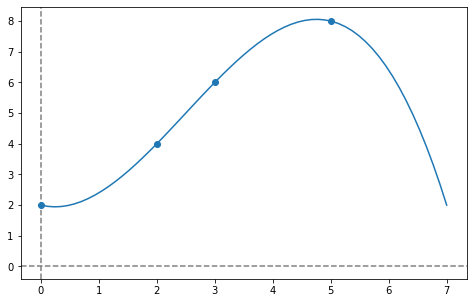

In [11]:
m=3
ng=60
N_interpolator(xv,fv,a,b,n,m,ng)

**Приклад 2.** Інтерполювання функції $f(x)=sin(x),\; x \in [0,2\pi]$  в ``ng`` **рівновіддалених точках** 

In [12]:
def xv(a,b,n):
    x=np.linspace(a,b,n+1)
    return x

In [13]:
def fv(a,b,n):   
    x=np.linspace(a,b,n+1)
    f=np.sin(x)#+1
    return f

In [14]:
a=0
b=2*np.pi
n=3

array([ 0.00000000e+00,  1.85221183e-01,  3.51606314e-01,  4.99804911e-01,
        6.30466494e-01,  7.44240581e-01,  8.41776692e-01,  9.23724346e-01,
        9.90733062e-01,  1.04345236e+00,  1.08253175e+00,  1.10862077e+00,
        1.12236892e+00,  1.12442573e+00,  1.11544072e+00,  1.09606340e+00,
        1.06694330e+00,  1.02872993e+00,  9.82072808e-01,  9.27621461e-01,
        8.66025404e-01,  7.97934156e-01,  7.23997238e-01,  6.44864166e-01,
        5.61184462e-01,  4.73607643e-01,  3.82783228e-01,  2.89360738e-01,
        1.93989690e-01,  9.73196048e-02,  5.55111512e-17, -9.73196048e-02,
       -1.93989690e-01, -2.89360738e-01, -3.82783228e-01, -4.73607643e-01,
       -5.61184462e-01, -6.44864166e-01, -7.23997238e-01, -7.97934156e-01,
       -8.66025404e-01, -9.27621461e-01, -9.82072808e-01, -1.02872993e+00,
       -1.06694330e+00, -1.09606340e+00, -1.11544072e+00, -1.12442573e+00,
       -1.12236892e+00, -1.10862077e+00, -1.08253175e+00, -1.04345236e+00,
       -9.90733062e-01, -

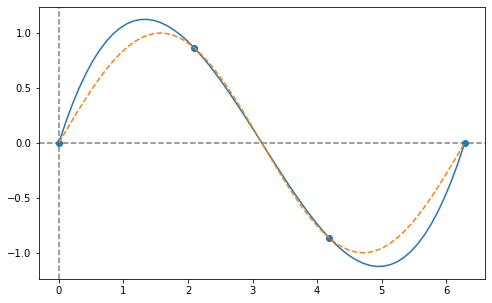

In [15]:
m=3
ng=60
N_interpolator(xv,fv,a,b,n,m,ng,fr=True)

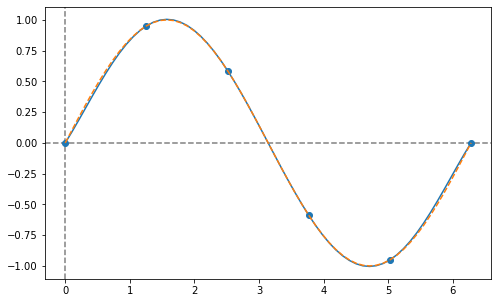

In [16]:
n = 5
m = 5
pn = N_interpolator(xv,fv,a,b,n,m,ng,fr=True)

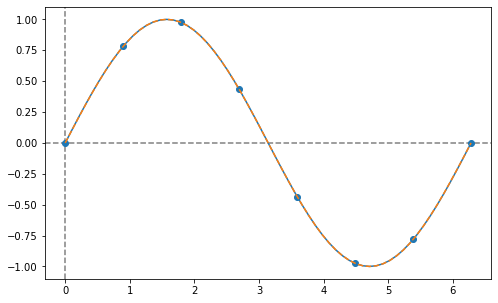

In [17]:
n = 7
m = 7
pn = N_interpolator(xv,fv,a,b,n,m,ng,fr=True)

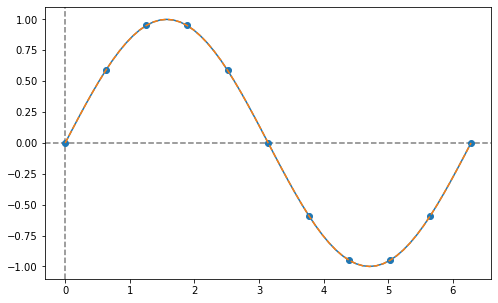

In [18]:
n = 10
m = 10
pn = N_interpolator(xv,fv,a,b,n,m,ng,fr=True)

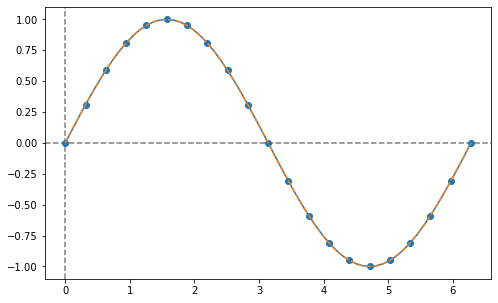

In [19]:
n = 20
m = 20
pn = N_interpolator(xv,fv,a,b,n,m,ng,fr=True)

In [20]:
plt.close('all')